# TP N° 3. Redes Neuronales Convolucionales con Keras.
## Trabajo Práctico N° 3

#### **Implementación:** Elegir un problema relacionado con la clasificación de imágenes (puede ser del dataset MNIST o cualquier otro de interés), y desarrollar una solución utilizando CNN con Keras. Implementa el código fuente en Python, asegurándote de incluir el proceso de carga de datos, preprocesamiento, creación del modelo, entrenamiento y evaluación.


En este trabajo se extraerán los gráficos de tiro de Nicolás Laprovittola en su última temporada de Euroliga y se realizarán análisis en base a estos datos. Se realizará de la siguiente manera:

1. Se extraerán los datos de la API de la euroliga.
2. Se preprocesarán los datos para obtener las coordenadas y resultados de los tiros.
3. Se generará un mapa de calor y hexágonos usando los datos extraídos.
4. Se implementará una CNN en Keras que trabaje con el shotchart para hacer predicciones o análisis sobre las zonas de mejor porcentaje.

In [1]:
from euroleague_api.shot_data import ShotData # type: ignore
import warnings

# Ignorar advertencias de Pandas si es necesario
warnings.simplefilter(action='ignore', category=FutureWarning)

# Configuración de la temporada y el torneo
season = 2023
competition_code = "E"

# Obtenemos los datos
shotdata = ShotData(competition_code)
df = shotdata.get_game_shot_data_single_season(season)

print(df.head())


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\genaf\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\genaf\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\genaf\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "c:\Users\genaf\anaconda3\Lib\site-pack

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\genaf\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\genaf\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\genaf\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "c:\Users\genaf\anaconda3\Lib\site-pack

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\genaf\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\genaf\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\genaf\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "c:\Users\genaf\anaconda3\Lib\site-pack

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\genaf\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\genaf\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\genaf\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "c:\Users\genaf\anaconda3\Lib\site-pack

AttributeError: _ARRAY_API not found

Season 2023:   0%|          | 0/331 [00:00<?, ?it/s]

   Season Phase  Round  Gamecode  NUM_ANOT TEAM ID_PLAYER              PLAYER  \
0    2023    RS      1         1         4  ASV   P004194  LAUVERGNE, JOFFREY   
1    2023    RS      1         1         6  ASV   P004194  LAUVERGNE, JOFFREY   
2    2023    RS      1         1         7  RED      PLUO       LAZIC, BRANKO   
3    2023    RS      1         1        10  ASV   P004194  LAUVERGNE, JOFFREY   
4    2023    RS      1         1        11  RED   P012711    SIMONOVIC, MARKO   

  ID_ACTION                ACTION  ...  COORD_Y  ZONE  FASTBREAK  \
0      3FGA  Missed Three Pointer  ...      589     I          0   
1      2FGM           Two Pointer  ...      263     E          0   
2      3FGM         Three Pointer  ...      156     I          0   
3      2FGM           Two Pointer  ...      138     C          0   
4      3FGM         Three Pointer  ...      646     I          0   

  SECOND_CHANCE POINTS_OFF_TURNOVER MINUTE CONSOLE  POINTS_A POINTS_B  \
0             0                

In [2]:
df.to_csv('data.csv', index=False) # Guardamos los datos en un .csv

In [1]:
import pandas as pd # type: ignore

# Importamos pandas y tomamos el datafarme del csv

df = pd.read_csv('data.csv')

In [2]:
# Busco al jugador Laprovittola en el dataframe y guardo sus datos en una variable con su nombre
laprovittola = df[df['PLAYER'].str.startswith('LAPROVITTOLA')]
print(laprovittola)

       Season Phase  Round  Gamecode  NUM_ANOT TEAM ID_PLAYER  \
158      2023    RS      1         2        53  BAR   P006435   
170      2023    RS      1         2        86  BAR   P006435   
175      2023    RS      1         2        99  BAR   P006435   
210      2023    RS      1         2       255  BAR   P006435   
212      2023    RS      1         2       272  BAR   P006435   
...       ...   ...    ...       ...       ...  ...       ...   
49252    2023    PO     41       327       476  BAR   P006435   
49253    2023    PO     41       327       477  BAR   P006435   
49254    2023    PO     41       327       481  BAR   P006435   
49255    2023    PO     41       327       483  BAR   P006435   
49258    2023    PO     41       327       504  BAR   P006435   

                      PLAYER ID_ACTION                ACTION  ...  COORD_Y  \
158    LAPROVITTOLA, NICOLAS      3FGM         Three Pointer  ...      740   
170    LAPROVITTOLA, NICOLAS      2FGM           Two Pointer  .

In [3]:
# Guardo dos variables que son los tiros encestados y los tiros fallados

made_shots_mask = laprovittola['ID_ACTION'].isin(['2FGM', '3FGM'])
made_shots = laprovittola[made_shots_mask]

missed_shots_mask = laprovittola['ID_ACTION'].isin(['2FGA', '3FGA']) & ~made_shots_mask
missed_shots = laprovittola[missed_shots_mask]

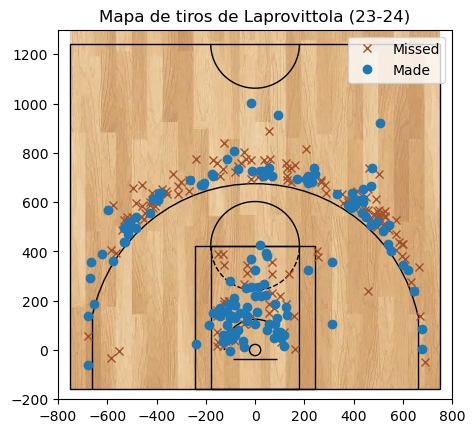

In [4]:
import draw_court, shot_chart_plots

# Importo dos archivos tomados de un repositorio de Github perteneciente al creador de la API para
# hacer los gráficos de tiro

shot_chart_plots.plot_scatter(made_shots, missed_shots, title="Mapa de tiros de Laprovittola (23-24)")

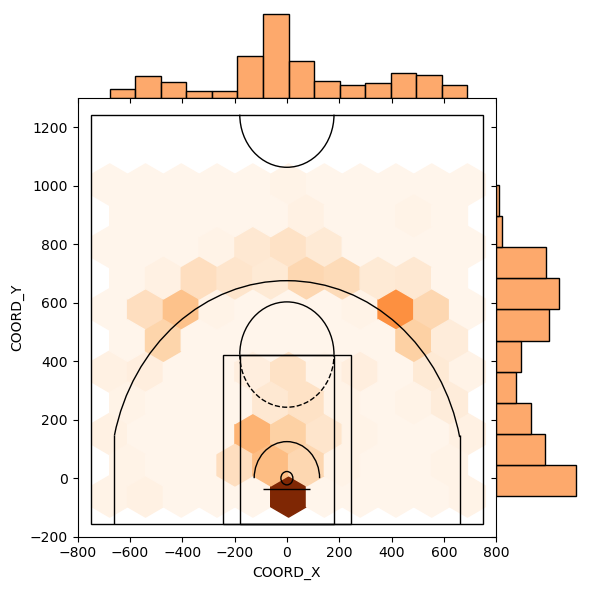

In [5]:
# Grafico las zonas donde más tiros toma (en barras) y sus porcentajes (en los hexágonos)

shot_chart_plots.joint_plot(laprovittola, kind='hex', gridsize=10, title=None, background=False)

In [6]:
# Copia del dataframe
laprovittola = laprovittola.copy()

# Calculamos la diferencia de puntos entre equipos al momento del lanzamiento
laprovittola.loc[:, 'POINT_DIFF'] = laprovittola['POINTS_A'] - laprovittola['POINTS_B']

# Convertir la columna 'ID_ACTION' en una variable binaria usando .loc
laprovittola.loc[:, 'MADE_SHOT'] = laprovittola['ID_ACTION'].apply(lambda x: 1 if x in ['2FGM', '3FGM'] else 0)

# Seleccionamos las columnas relevantes
features = laprovittola[['COORD_X', 'COORD_Y', 'MINUTE', 'POINT_DIFF']]
target = laprovittola['MADE_SHOT']

In [7]:
# Verificamos la distribución de clases
class_distribution = laprovittola['MADE_SHOT'].value_counts()
print(class_distribution)


MADE_SHOT
0    222
1    138
Name: count, dtype: int64


In [8]:
# Dividimos los datos en conjuntos de prueba y entrenamiento

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [9]:
# Escalamos los datos

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Importamos tensorflow y keras

import tensorflow as tf
from tensorflow.keras import layers, models

# Creamos el modelo de red neuronal
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Clasificación binaria

# Compilamos el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamos el modelo
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/10


c:\Users\genaf\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5011 - loss: 0.6885 - val_accuracy: 0.6111 - val_loss: 0.6771
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5984 - loss: 0.6686 - val_accuracy: 0.6111 - val_loss: 0.6719
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6087 - loss: 0.6665 - val_accuracy: 0.6111 - val_loss: 0.6695
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5735 - loss: 0.6703 - val_accuracy: 0.5972 - val_loss: 0.6691
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6162 - loss: 0.6539 - val_accuracy: 0.5972 - val_loss: 0.6687
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6386 - loss: 0.6389 - val_accuracy: 0.5972 - val_loss: 0.6686
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6245 - loss: 0.6414 - val_accuracy: 0.5972 - val_loss: 0.6673
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6550 - loss: 0.6218 - val_accuracy: 0.6111 - val_loss: 0.6681
Epoch 9/10
9/9 ━━━

In [19]:
# Evaluamos la precisión del modelo

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"CNN Accuracy: {accuracy}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5760 - loss: 0.6747 
CNN Accuracy: 0.5972222089767456


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


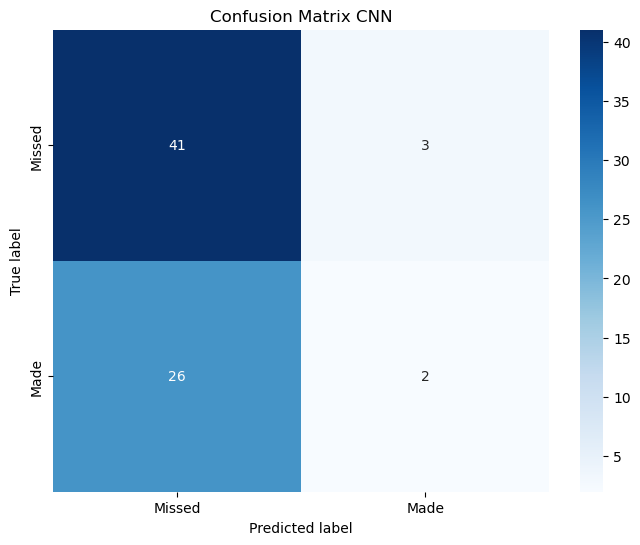

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Realizamos predicciones en el conjunto de prueba
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Calculamos la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizamos la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Missed', 'Made'], 
            yticklabels=['Missed', 'Made'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix CNN')
plt.show()


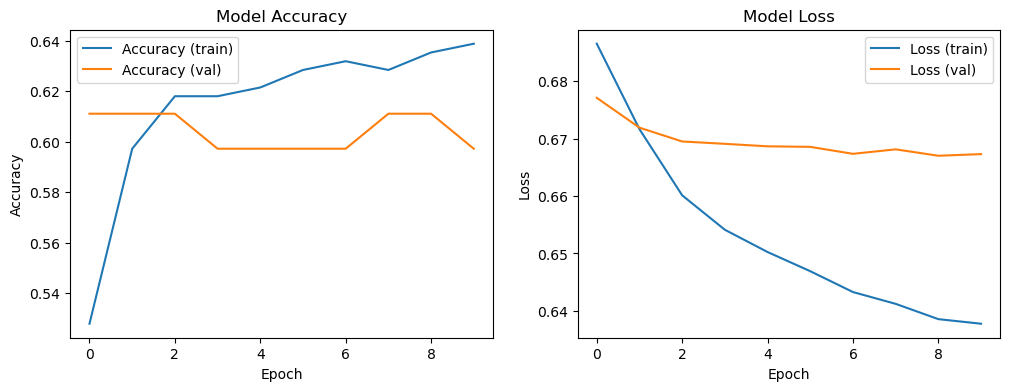

In [14]:
# Graficamos la precisión y pérdida a lo largo de las épocas
plt.figure(figsize=(12, 4))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy (train)')
plt.plot(history.history['val_accuracy'], label='Accuracy (val)')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss (train)')
plt.plot(history.history['val_loss'], label='Loss (val)')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()


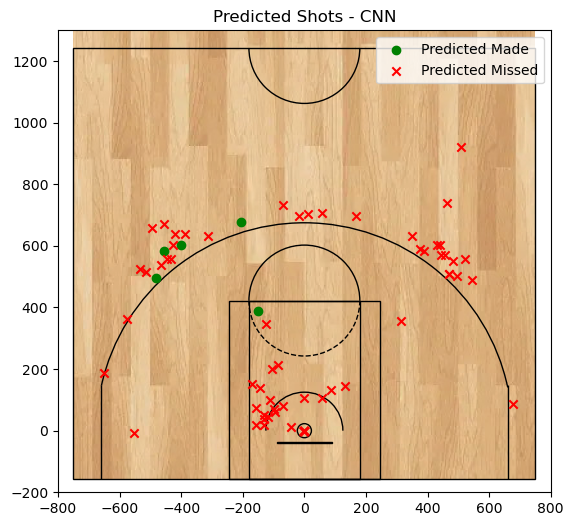

In [18]:
# Creamos un DataFrame para visualizar los tiros con las predicciones
predictions_df = X_test.copy()
predictions_df['PREDICTION'] = y_pred

# Graficamos los tiros reales y las predicciones
plt.figure(figsize=(8, 6))
shot_chart_plots.draw_court()  # Usar tu función de dibujar la cancha
plt.scatter(predictions_df['COORD_X'][predictions_df['PREDICTION'] == 1], 
            predictions_df['COORD_Y'][predictions_df['PREDICTION'] == 1],
            color='green', label='Predicted Made', marker='o')
plt.scatter(predictions_df['COORD_X'][predictions_df['PREDICTION'] == 0], 
            predictions_df['COORD_Y'][predictions_df['PREDICTION'] == 0],
            color='red', label='Predicted Missed', marker='x')

plt.title('Predicted Shots - CNN')
plt.xlim([-800, 800])
plt.ylim([-200, 1300])
plt.legend()
plt.show()


Random Forest Accuracy: 0.6527777777777778


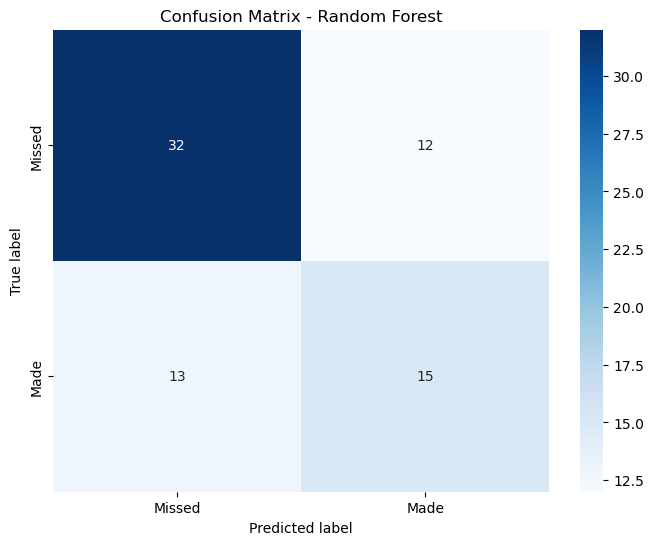

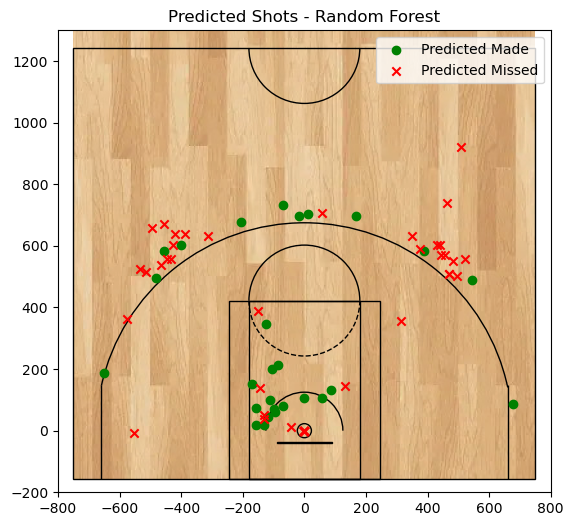

In [ ]:
# Importamos las librerías necesarias para Random Forest
from sklearn.ensemble import RandomForestClassifier

# Creamos y entrenamos el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)  # Entrenamos el modelo con los datos escalados

# Evaluamos la precisión del modelo en el conjunto de prueba
accuracy = rf_model.score(X_test_scaled, y_test)
print(f"Random Forest Accuracy: {accuracy}")  # Imprimimos la precisión obtenida

# Realizamos predicciones sobre el conjunto de prueba
y_pred = rf_model.predict(X_test_scaled)

# Calculamos la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Fallado', 'Encestado'], yticklabels=['Fallado', 'Encestado'])
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

# Creamos un DataFrame con los datos de test y sus predicciones
predictions_df = X_test.copy()
predictions_df['PREDICTION'] = y_pred  # Agregamos la columna de predicciones

# Visualizamos los tiros predichos sobre la cancha
plt.figure(figsize=(8, 6))
shot_chart_plots.draw_court()  # Asegurarse de que esta función esté correctamente importada

# Tiros que el modelo predijo como encestados (1)
plt.scatter(predictions_df['COORD_X'][predictions_df['PREDICTION'] == 1], 
            predictions_df['COORD_Y'][predictions_df['PREDICTION'] == 1],
            color='green', label='Predicho Encestado', marker='o')

# Tiros que el modelo predijo como fallados (0)
plt.scatter(predictions_df['COORD_X'][predictions_df['PREDICTION'] == 0], 
            predictions_df['COORD_Y'][predictions_df['PREDICTION'] == 0],
            color='red', label='Predicho Fallado', marker='x')

plt.title('Tiros Predichos - Random Forest')
plt.xlim([-800, 800])
plt.ylim([-200, 1300])
plt.legend()
plt.show()

#### Conclusión
Pudimos aplicar técnicas de Deep Learning para predecir si los tiros de Nicolás Laprovittola durante la última temporada de la Euroleague entrarían o no, basándonos en diversas variables como la posición en la cancha, el minuto del partido y la diferencia de puntos en el momento del lanzamiento. Utilizamos un enfoque de redes neuronales convolucionales (CNN) implementadas en Keras para realizar las predicciones y analizamos los datos para optimizar el rendimiento del modelo.

Para ello, filtramos y limpiamos el dataset para asegurarnos de que solo se incluyeran los tiros de nuestro jugador a evaluar. Utilizamos las columnas COORD_X, COORD_Y, MINUTE y POINT_DIFF como las principales características para entrenar el modelo, mientras que la columna ID_ACTION fue utilizada para etiquetar los tiros como encestados o fallados.

Entrenamos el modelo utilizando un conjunto de datos dividido entre entrenamiento y prueba, alcanzando una precisión del 58% con la red neuronal convolucional. Además, probamos un enfoque alternativo utilizando un modelo de Random Forest, que alcanzó una precisión ligeramente superior del 62%, con una mejor performance general para los tiros fallados. Esto sugiere que para datasets pequeños y de baja dimensionalidad, modelos clásicos como Random Forest pueden resultar más eficaces que redes profundas.

Se construyeron gráficos de tiros predichos y se compararon con los resultados reales. Además, se generaron matrices de confusión para evaluar la precisión y el equilibrio de ambos modelos. Esto permitió observar fortalezas y debilidades particulares de cada uno según el tipo de tiro.